In [23]:
import pandas as pd
import category_encoders as ce
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

hotels = pd.read_csv('hotels.csv')
hotels.head(5)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


# Описательный анализ и очистка данных

In [24]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

В датасете в 16 и 17 столбце есть пропуски.

In [25]:
hotels['lng'] = hotels['lng'].fillna(hotels['lng'].median())
hotels['lat'] = hotels['lat'].fillna(hotels['lat'].median())
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [26]:
print('Количество дубликатов: {}'.format(hotels[hotels.duplicated()].shape[0]))

Количество дубликатов: 307


В датасете обнаружено 307 дубликатов.

In [27]:
hotels.drop_duplicates(inplace=True)

# Исследование данных

In [28]:
bin_encoder = ce.BinaryEncoder(cols=['tags']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels['tags'].explode())
hotels = pd.concat([hotels, type_bin], axis=1)

hotels

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,tags_6,tags_7,tags_8,tags_9,tags_10,tags_11,tags_12,tags_13,tags_14,tags_15
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,0,0,0,0,0,0,0,0,0,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,0,0,0,0,0,0,0,0,1,0
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,0,0,0,0,0,0,0,0,1,1
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,0,0,0,0,0,0,0,1,0,0
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,107,4/19/2017,9.0,Hotel Moonlight,France,No Negative,0,617,Tr s proche du metro Earl s court,...,1,1,1,0,1,1,0,1,0,0
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2/13/2017,8.4,BEST WESTERN PLUS Amedia Wien,Turkey,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,0,0,1,0,0,0,1,1,0,1
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2/7/2016,6.8,Bloomsbury Palace Hotel,Netherlands,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,0,0,1,0,0,1,0,1,1,0
386801,31 Great Cumberland Place Westminster Borough ...,365,5/21/2017,8.1,The Marble Arch London,United Arab Emirates,No Negative,0,1567,Location and very comfy bed,...,0,1,1,1,0,0,0,1,1,0


In [29]:
# Преобразование типа признака 'days_since_review' в числовой
hotels['days_since_review'] = hotels['days_since_review'].apply(lambda x: x[0:2] if type(x[3]) is str else x[0:3])
hotels['days_since_review'] = hotels['days_since_review'].astype('int64')

In [30]:
# Преобразование типа признака 'review_date' в дату
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
hotels['review_date']

0        2016-02-19
1        2017-01-12
2        2016-10-18
3        2015-09-22
4        2016-03-05
            ...    
386798   2017-04-19
386799   2017-02-13
386800   2016-02-07
386801   2017-05-21
386802   2016-08-05
Name: review_date, Length: 386496, dtype: datetime64[ns]

In [31]:
hotels['quarter'] = hotels['review_date'].dt.quarter
hotels['quarter']

0         1
1         1
2         4
3         3
4         1
         ..
386798    2
386799    1
386800    1
386801    2
386802    3
Name: quarter, Length: 386496, dtype: int32

C:\Users\MSI\AppData\Local\Temp\ipykernel_10976\701006380.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotels, x='quarter', palette='pastel')


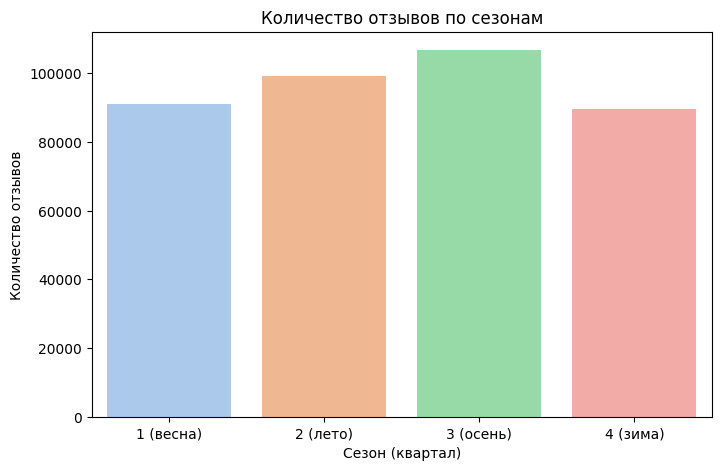

In [32]:
# Строим гистограмму
plt.figure(figsize=(8, 5))
sns.countplot(data=hotels, x='quarter', palette='pastel')
plt.title('Количество отзывов по сезонам')
plt.xlabel('Сезон (квартал)')
plt.ylabel('Количество отзывов')
plt.xticks([0, 1, 2, 3], ['1 (весна)', '2 (лето)', '3 (осень)', '4 (зима)'])
plt.show()

Исходя из графика наибольшее число отзывов было совершенно осенью

In [33]:
# Преобразование признака 'reviewer_nationality'
def hotels_nationality(c):
    city = [' United Kingdom ', ' United States of America ']
    if c in city:
        return c
    else:
        return 'other'
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].apply(hotels_nationality)
hotels['reviewer_nationality']

0          United Kingdom 
1          United Kingdom 
2                    other
3          United Kingdom 
4                    other
                ...       
386798               other
386799               other
386800               other
386801               other
386802               other
Name: reviewer_nationality, Length: 386496, dtype: object

C:\Users\MSI\AppData\Local\Temp\ipykernel_10976\4065985477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hotels, x='reviewer_nationality', palette='pastel')


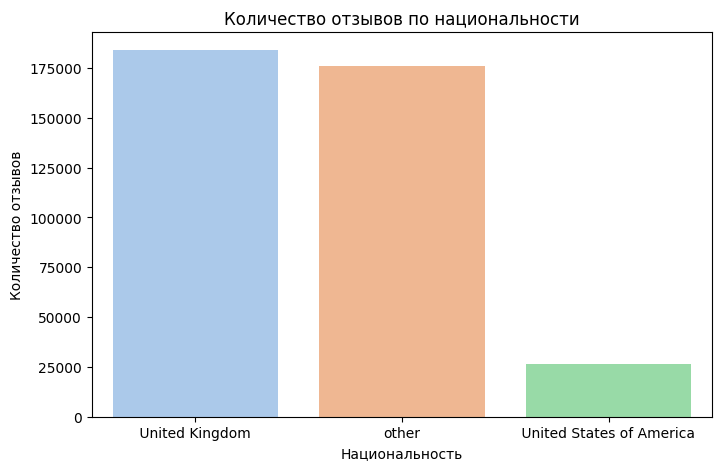

In [34]:
# Строим гистограмму
plt.figure(figsize=(8, 5))
sns.countplot(data=hotels, x='reviewer_nationality', palette='pastel')
plt.title('Количество отзывов по национальности')
plt.xlabel('Национальность')
plt.ylabel('Количество отзывов')
plt.show()

In [35]:
# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'reviewer_nationality',
	'mapping': {' United States of America ': 3, ' United Kingdom ': 2, 'other': 1}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(hotels[['reviewer_nationality']])
# добавляем результат к исходному DataFrame
hotels = pd.concat([hotels, data_bin], axis=1)

hotels

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,tags_8,tags_9,tags_10,tags_11,tags_12,tags_13,tags_14,tags_15,quarter,reviewer_nationality
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,0,0,0,0,0,0,0,1,1,2
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,0,0,0,0,0,0,1,0,1,2
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,other,No kettle in room,6,406,No Positive,...,0,0,0,0,0,0,1,1,4,1
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,0,0,0,0,0,1,0,0,3,2
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,other,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,0,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386798,9 Knaresborough Place Kensington and Chelsea L...,107,2017-04-19,9.0,Hotel Moonlight,other,No Negative,0,617,Tr s proche du metro Earl s court,...,1,0,1,1,0,1,0,0,2,1
386799,Landstra er Hauptstra e 155 03 Landstra e 1030...,272,2017-02-13,8.4,BEST WESTERN PLUS Amedia Wien,other,No Negative,0,3224,The bed was so comfy I stayed with my boyfrie...,...,1,0,0,0,1,1,0,1,1,1
386800,29 31 Gower Street Camden London WC1E 6HG Unit...,457,2016-02-07,6.8,Bloomsbury Palace Hotel,other,room is really small but guess is normal in L...,12,2751,great location simple check in out nice shower,...,1,0,0,1,0,1,1,0,1,1
386801,31 Great Cumberland Place Westminster Borough ...,365,2017-05-21,8.1,The Marble Arch London,other,No Negative,0,1567,Location and very comfy bed,...,1,1,0,0,0,1,1,0,2,1


In [36]:
# Удаляем ненужные признаки
hotels = hotels.drop(['hotel_address', 'hotel_name', 'review_date',  'reviewer_nationality', 'negative_review', 'positive_review', 'tags'], axis=1)

In [37]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386496 entries, 0 to 386802
Data columns (total 27 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386496 non-null  int64  
 1   average_score                               386496 non-null  float64
 2   review_total_negative_word_counts           386496 non-null  int64  
 3   total_number_of_reviews                     386496 non-null  int64  
 4   review_total_positive_word_counts           386496 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386496 non-null  int64  
 6   reviewer_score                              386496 non-null  float64
 7   days_since_review                           386496 non-null  int64  
 8   lat                                         386496 non-null  float64
 9   lng                                         386496 non-null  float64
 10  t

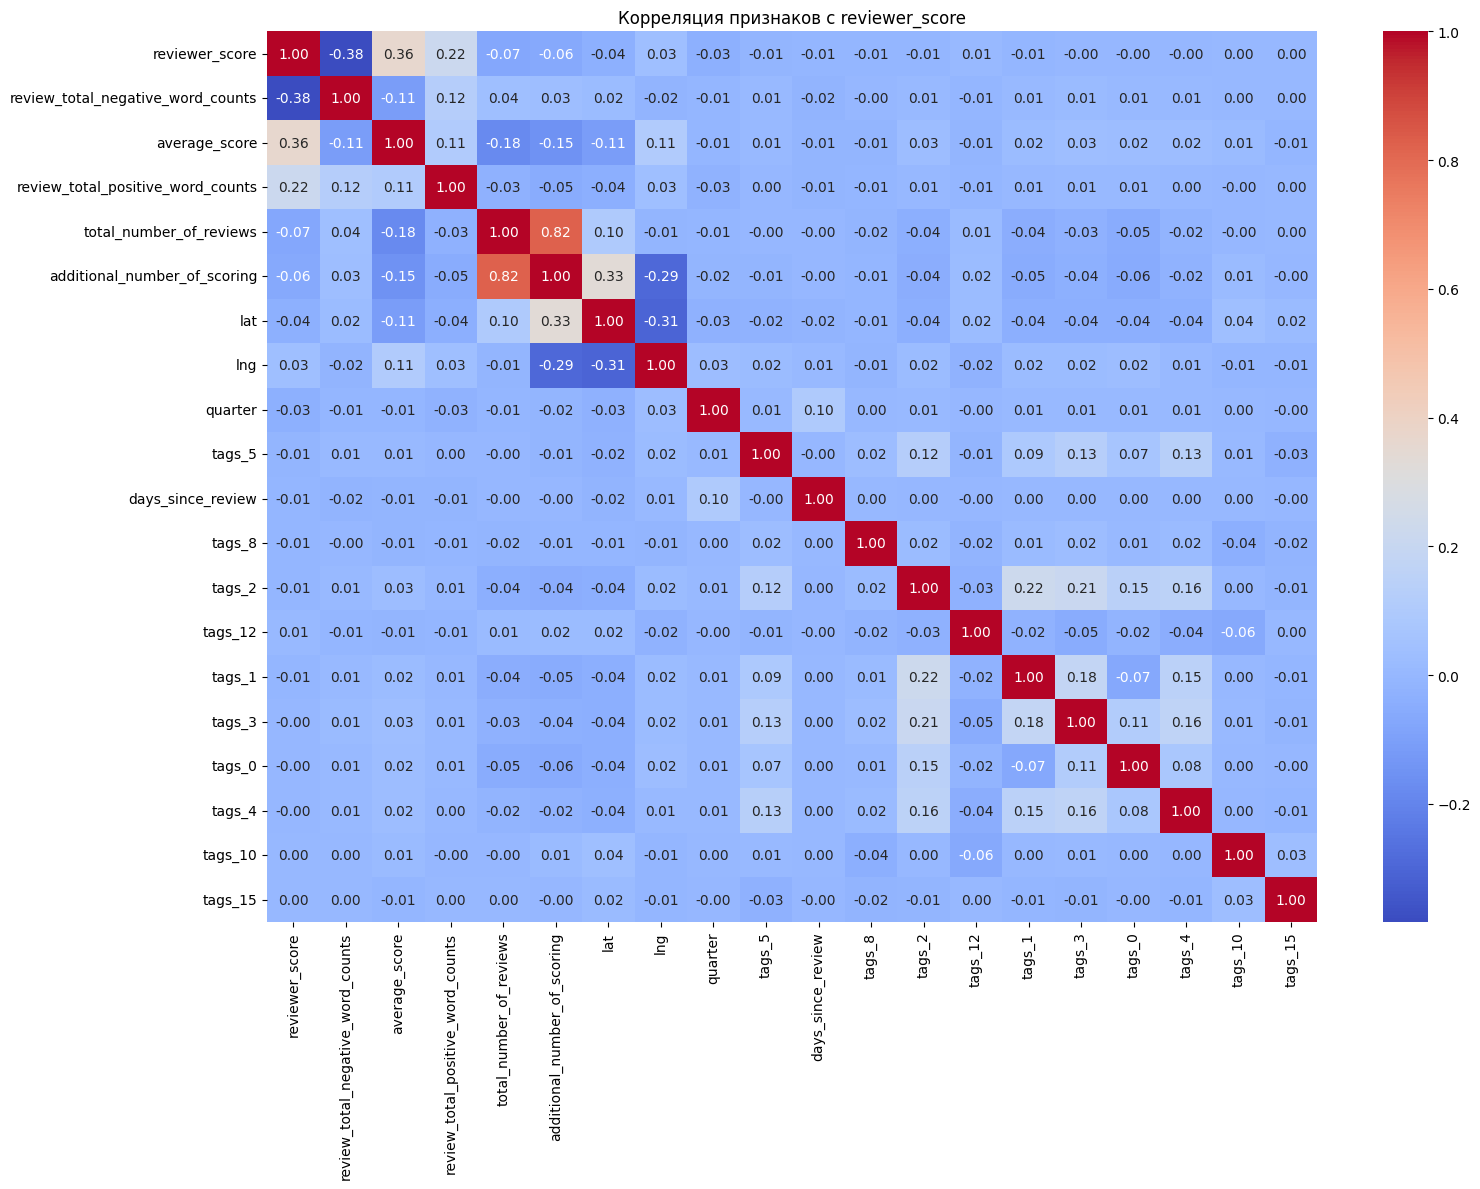

In [38]:
# Построим тепловую карту коррелиций
corr = hotels.corr()
top_corr = corr['reviewer_score'].abs().sort_values(ascending=False).head(20).index

plt.figure(figsize=(16, 12))
sns.heatmap(hotels[top_corr].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция признаков с reviewer_score')
plt.tight_layout()
plt.show()

# Модель машинного обучения 

In [39]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [40]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

In [42]:
 # Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
    # Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
print('MAPE: ', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE:  0.13700293518529227
